In [38]:
import os
import cv2
import glob
import dlib
import pygame

import numpy as np
import face_recognition
from threading import Thread
from imutils import face_utils
from scipy.spatial import distance as dist

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.preprocessing import image

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
face_cascade = cv2.CascadeClassifier("../models/haarcascade_russian_plate_number.xml")

In [40]:
image = cv2.imread("voiture-bleue-plaque-immatriculation-full-12878163.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [41]:
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

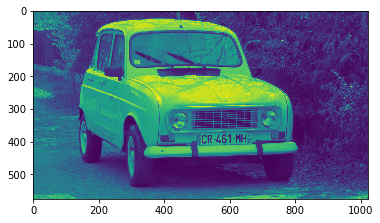

In [42]:
plt.imshow(gray)

In [43]:
face_boxes = face_cascade.detectMultiScale(gray)

In [44]:
xy = (face_boxes[0][0], face_boxes[0][1])
width = face_boxes[0][2]
height = face_boxes[0][3]

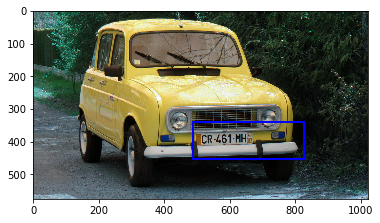

In [45]:
fig,ax = plt.subplots(1)
ax.imshow(image)
rect = patches.Rectangle(xy, width, height,linewidth=2,edgecolor='b',facecolor='none')
ax.add_patch(rect)
plt.show()

In [46]:
crop_img = image[face_boxes[0][1]: face_boxes[0][1] + face_boxes[0][3], face_boxes[0][0]:face_boxes[0][0] + face_boxes[0][2]]

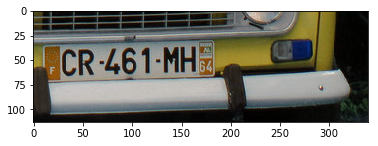

In [47]:
plt.imshow(crop_img)

In [48]:
crop_img.shape

(113, 340, 3)

In [49]:
#ret, im_th = cv2.threshold(crop_img, 90, 255, cv2.THRESH_BINARY_INV)
#plt.imshow(im_th)
#gray = cv2.cvtColor(im_th, cv2.COLOR_RGB2GRAY)
#plt.imshow(gray)

In [50]:
imgray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

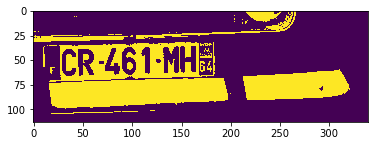

In [51]:
plt.imshow(im2)

In [52]:
im2.shape

(113, 340)

In [53]:
rects = [cv2.boundingRect(ctr) for ctr in contours]

In [54]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

In [55]:
clf = joblib.load("digits_cls.pkl")

In [56]:
im = crop_img

In [57]:
im.shape

(113, 340, 3)

In [58]:
def a(rect):
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = thresh[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

for rect in rects:
    # Draw the rectangles
    try:
        a(rect)
    except:
        pass
cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()

In [ ]:
for rect in rects:
    try:
        cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
        # Make the rectangular region around the digit
        leng = int(rect[3] * 1)
        pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
        pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
        roi = thresh[pt1:pt1+leng, pt2:pt2+leng]
        # Resize the image
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi, (1, 1))
        # Calculate the HOG features
        roi_hog_fd = hog(roi, orientations=1, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualise=False)
    except:
        pass
cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()

/Users/az02210/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
